In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
visa_df=pd.read_csv(r"C:\Users\vamsh\OneDrive\NARESHIT\DATA_FOLDER\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box Plot**

- Box plot is used to detect outliers
- box plot has values like q1, q2, q3 and max
- Inside box plot red line represents median which is 50 percentile data

**Outliers**

- very very huge observation/ very very small observation
- which pull the data in any side of the distribution
  
- mild outliers
      - q1-1.5*IQR and q3+1.5*IQR

- Strong outliers
      - q1-3*IQR and q3+3*IQR

- IQR means inter quartile range
        - IQR=Q3-Q1
- q1:25p
- q2:50p
- q3:75p

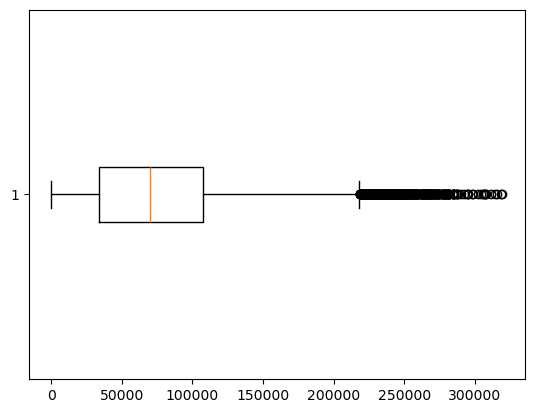

In [17]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

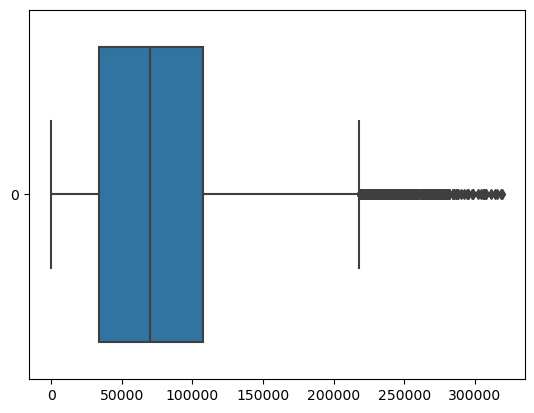

In [18]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')
plt.show()

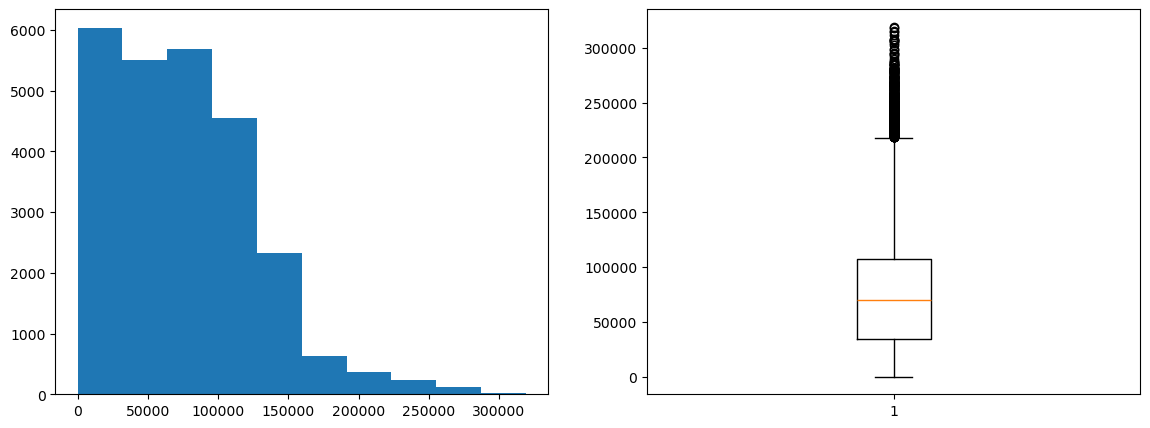

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- outliers are avialable less than q1-1.5*IQR
- outliers are available greater than q3+1.5*IQR

- step-1:
      - calculate Q1:25p
      - calculate Q3:75p
      - calculate IQR: Q3-Q1

- step-2:
      - LB= Q1-1.5*IQR
      - UB= Q3+1.5*IQR

- Step-3:
      - con1= visa_df['prevailing_wage']<LB
      - con2= visa_df['prevailing_wage']>UB
      - apply 'or' operator and get the outliers data

In [27]:
Q1=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
Q3=round(np.quantile(visa_df['prevailing_wage'],0.75),2)

print(f'The 25% data of Q1 is {Q1}')
print(f'The 75% data of Q3 is {Q2}')

The 25% data of Q1 is 34015.48
The 75% data of Q3 is 107735.51


In [28]:
IQR=Q3-Q1
IQR

73720.03

In [29]:
LB=Q1-1.5*IQR

In [38]:
LB

-76564.565

In [63]:
UB=Q3+1.5*IQR

In [40]:
UB

218315.555

**outliers_data**

In [70]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]

In [69]:
len(outliers_data)

427

**non outliers data**

In [72]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]

In [73]:
len(non_outliers_data)

25053

In [74]:
25053+427

25480

**Histogram and boxplot for non outliers data**

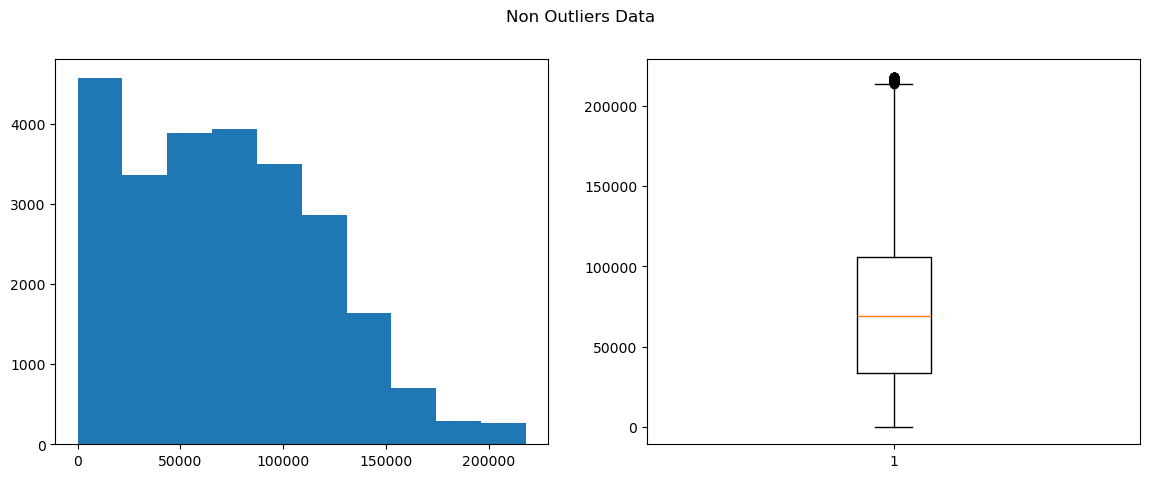

In [76]:
plt.figure(figsize=(14,5))
plt.suptitle('Non Outliers Data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])# 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])# 25053
plt.show()

**compare total data with non outliers data**

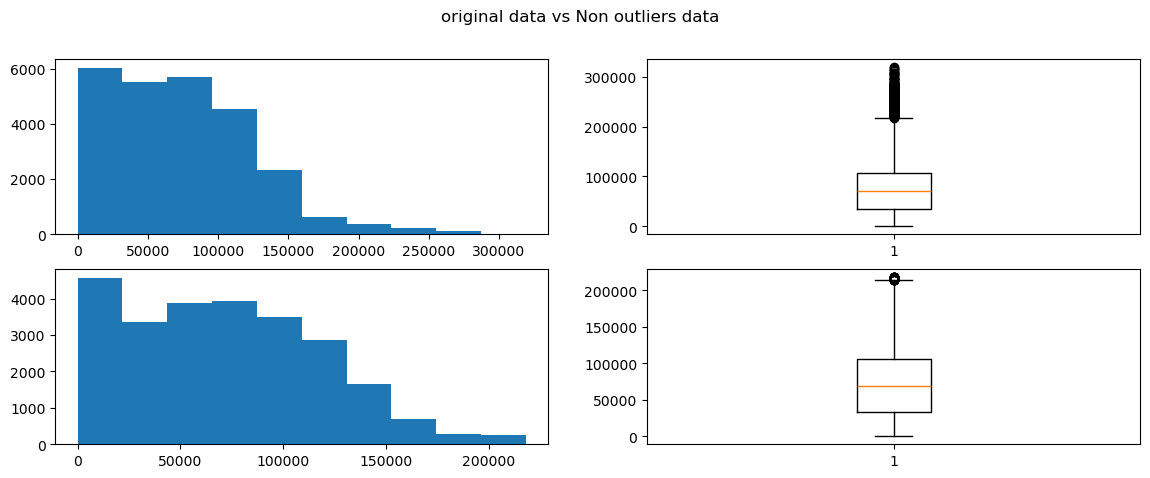

In [78]:
plt.figure(figsize=(14,5))
plt.suptitle('original data vs Non outliers data')
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'])
plt.show()


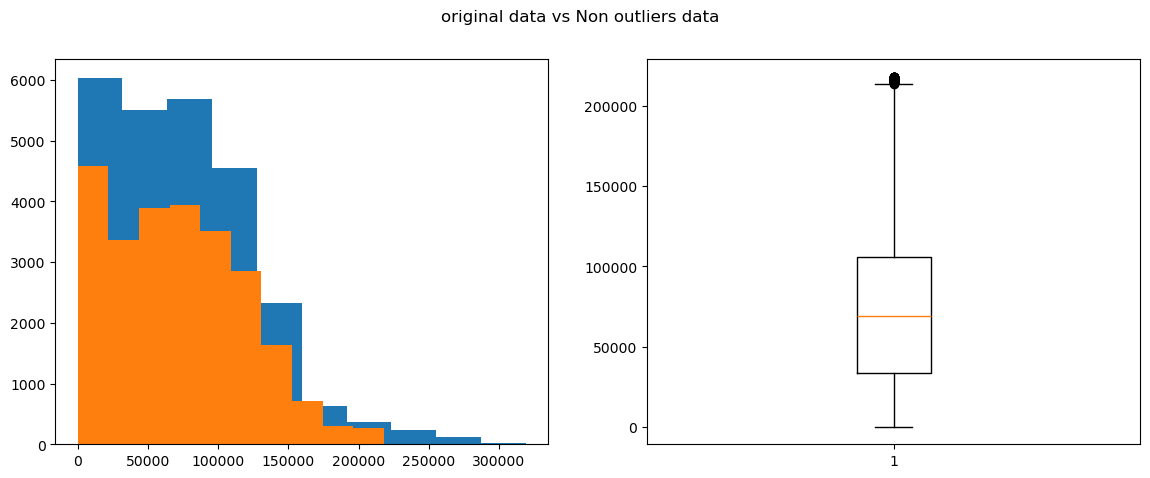

In [82]:
plt.figure(figsize=(14,5))
plt.suptitle('original data vs Non outliers data')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.show()


**How to deal the outliers**

**method-1: Drop the outliers**
    - dropping outliers is not good idea
    - because when you drop the outliers, data will be lost
    - for example here we are droping 427 rows
    - x% of 25480=427
    - it is 1.7% data, here it is fine we can drop the outlier
    - but generally it is not good idea

**method-2: Fill with median value**
    - we already know that outliers does not affect the median
    - so we can fill outliers by median

**method-3: cap the values with Q1 and Q3**
    - all less than lower bound values we can replace with q1 or LB
    - all greater than upper bound values, we can replace with q3 or UB

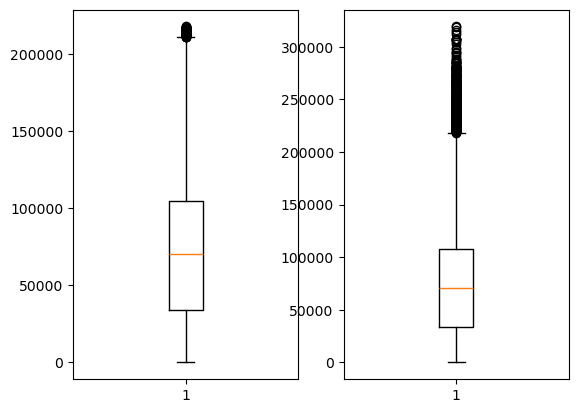

In [93]:
empty_list=[]
median_value=visa_df['prevailing_wage'].median()

Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

for i in visa_df['prevailing_wage'].values:
    if i<LB or i>UB:
        empty_list.append(median_value)
    else:
        empty_list.append(i)
        
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=empty_list
plt.subplot(1,2,1).boxplot(empty_list)
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**
- np.where will use for binary condition
- it has 3 arguments
        - condition
        - value if condition is True
        - value if condition is False

In [97]:
d={'sub':['DS','ML','CS'],
   'marks':[100,150,20]}
data=pd.DataFrame(d)
data

,sub,marks
0,DS,100
1,ML,150
2,CS,20


In [ ]:
# marks column replace with 1 when value>100

In [98]:
con=data['marks']>100
l=np.where(con,1,data['marks'])
#if condition TRue then replace with 1
#if condition is False then replaces with data{'marks'}
l

array([100,   1,  20], dtype=int64)

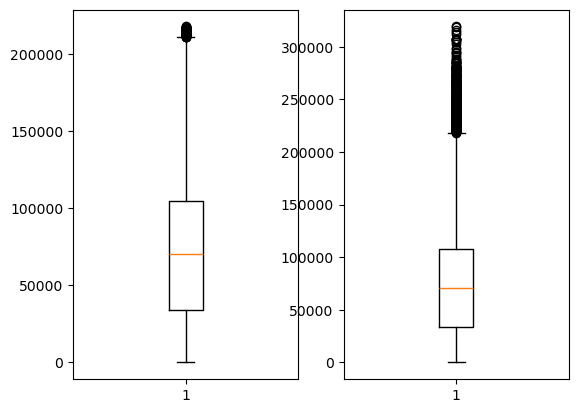

In [111]:
con1=visa_df['prevailing_wage']<LB 
con2=visa_df['prevailing_wage']>UB
con=con1|con2
median_value=visa_df['prevailing_wage'].median()
new_data=np.where(con,median_value,visa_df['prevailing_wage'])

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(new_data)
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()